In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

In [25]:
# Supervised Learning models being used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

In [2]:
# loading the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
#exploring the columns of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# count of each class
df['Class'].value_counts()

,count
Class,
0,284315
1,492


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

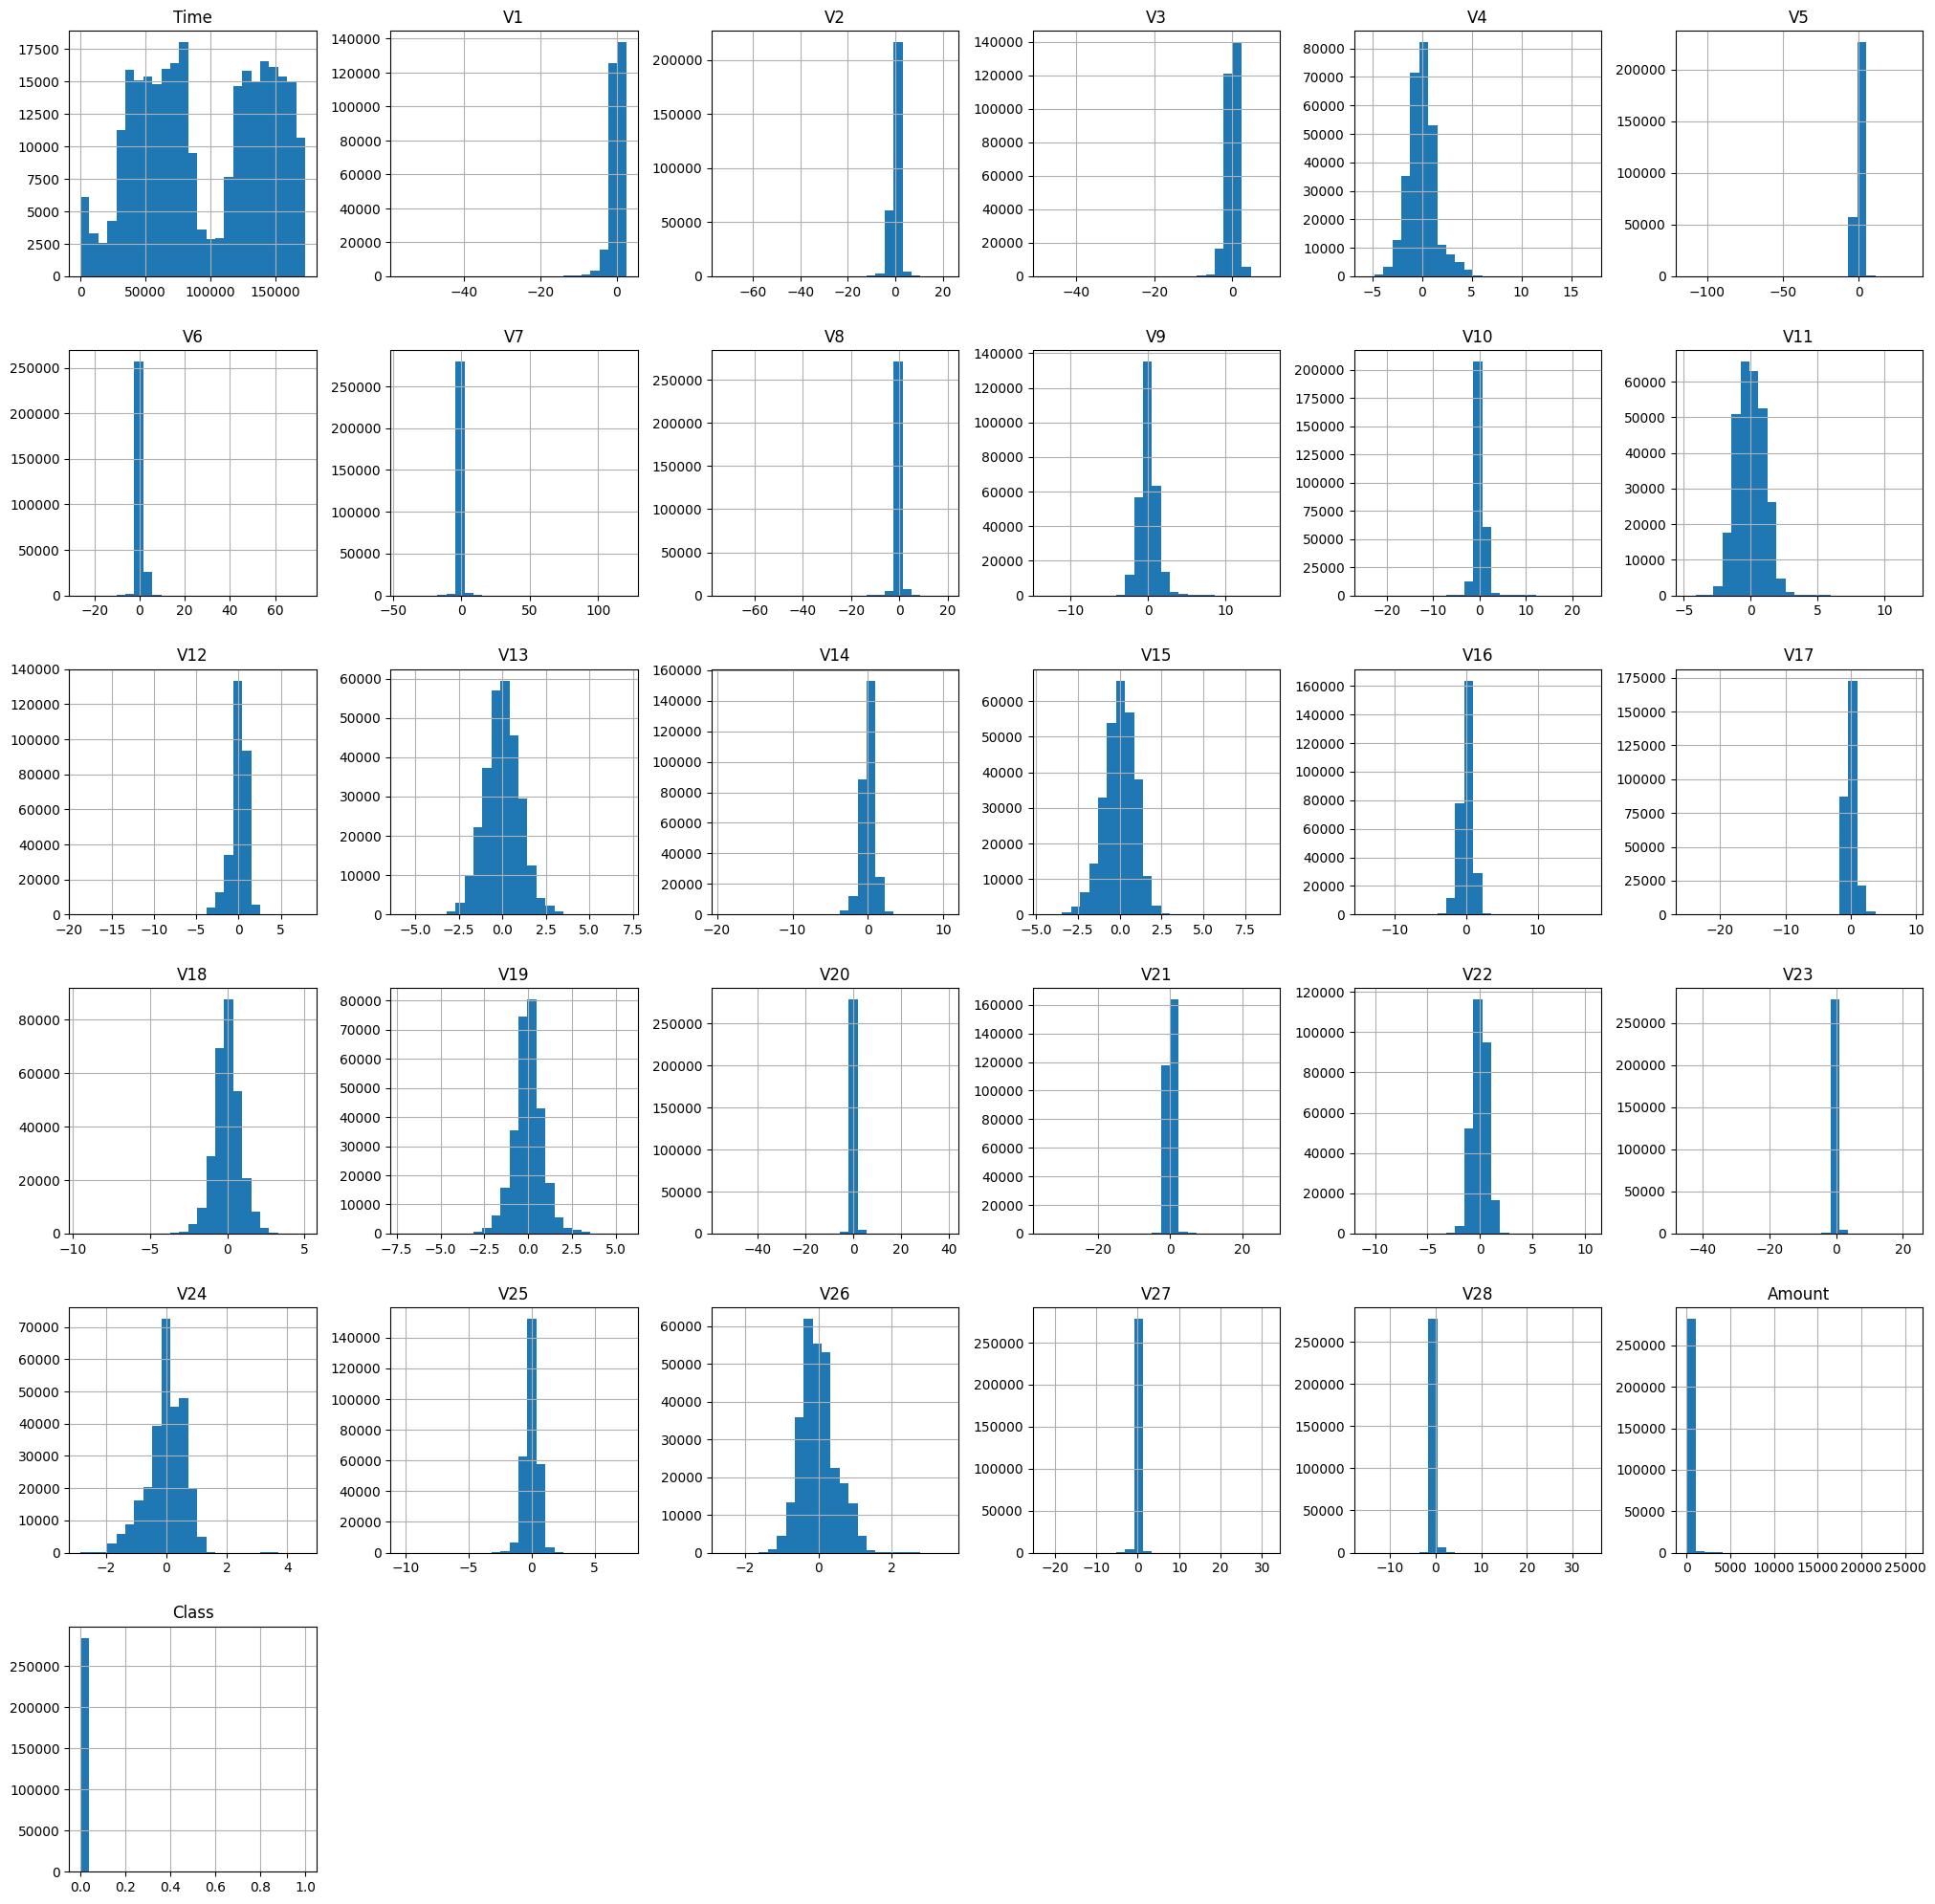

In [5]:
# Distributions of each column
df.hist(bins=25, figsize=(25, 25))

In [6]:
# Making a copy of the data frame
new_df = df.copy()

In [7]:
# Normalizing the 'Time' column to a range between 0 and 1 using min-max scaling
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Scale the 'Amount' column using RobustScaler to reduce the impact of outliers
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))

In [10]:
# Shuffling the dataset randomly while using the whole dataset. Using a fixed random seed for reproducibility.
new_df = new_df.sample(frac=1, random_state=1)

In [11]:
from sklearn.model_selection import train_test_split

# Splitting into train+val and test (80% train+val, 20% test)
train_val, test = train_test_split(new_df, test_size=0.2, stratify=new_df['Class'], random_state=1)

# Splitting train_val into train and val (80% train, 20% val of train_val)
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val['Class'], random_state=1)

# Check class distribution
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    181961
 1       315
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64,
 Class
 0    45490
 1       79
 Name: count, dtype: int64)

In [12]:
# Converting train, test, and validation DataFrames into NumPy arrays and displaying their shapes for verification
np_train, np_test, np_val = train.to_numpy(), test.to_numpy(), val.to_numpy()
np_train.shape, np_test.shape, np_val.shape

((182276, 31), (56962, 31), (45569, 31))

In [13]:
# Splitting each dataset into features and labels. Last column in the NumPy array is the target variable ('Class')
x_train, y_train = np_train[:, :-1], np_train[:, -1]
x_test, y_test = np_test[:, :-1], np_test[:, -1]
x_val, y_val = np_val[:, :-1], np_val[:, -1]

In [14]:
# Displaying the shapes of the feature and label arrays
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((182276, 30), (182276,), (56962, 30), (56962,), (45569, 30), (45569,))

# Supervised Learning Models

## Using Unbalanced Dataset

### Logistic Regression

In [15]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.999242906361781

In [17]:
log_report = classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud'])
print(log_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45490
       Fraud       0.87      0.66      0.75        79

    accuracy                           1.00     45569
   macro avg       0.93      0.83      0.87     45569
weighted avg       1.00      1.00      1.00     45569



### Random Forest

In [20]:
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)

In [21]:
rf_report = classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud'])
print(rf_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45490
       Fraud       0.88      0.57      0.69        79

    accuracy                           1.00     45569
   macro avg       0.94      0.78      0.85     45569
weighted avg       1.00      1.00      1.00     45569



### Gradient Boost Classifier

In [23]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)

In [24]:
gbc_report = classification_report(y_val, y_pred , target_names=['Not Fraud', 'Fraud'])
print(gbc_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     45490
       Fraud       0.81      0.70      0.75        79

    accuracy                           1.00     45569
   macro avg       0.90      0.85      0.87     45569
weighted avg       1.00      1.00      1.00     45569



### Linear SVC

In [26]:
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)

In [27]:
svc_report = classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud'])
print(svc_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     45490
       Fraud       0.08      0.90      0.14        79

    accuracy                           0.98     45569
   macro avg       0.54      0.94      0.57     45569
weighted avg       1.00      0.98      0.99     45569



## Using Balanced dataset

In [29]:
# Separating the dataset into non-fraudulent and fraudulent transactions
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')

# Displaying the count of each class to verify correct separation
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [30]:
# Performing undersampling to create a balanced dataset: Keeping all fraud cases and randomly sampling an equal number of non-fraud cases
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

,count
Class,
1,492
0,492


In [31]:
# Shuffling the balanced dataset to randomize the order of fraud and non-fraud transactions
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


In [32]:
# Converting the balanced DataFrame to a NumPy array
balanced_df_np = balanced_df.to_numpy()

# Manually splitting into training (700), test (142), and validation (remaining) sets
# Separating features and labels, and ensuring labels are integers
x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)

# Displaying the shapes of all splits
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [33]:
# Verifying the class distribution - 0 -> non-fraud and 1 -> fraud - across train, test, and validation sets
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 Name: count, dtype: int64,
 0    73
 1    69
 Name: count, dtype: int64,
 0    72
 1    70
 Name: count, dtype: int64)

### Logistic Regression

In [38]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
y_pred_b = logistic_model_b.predict(x_val_b)

In [39]:
logb_report = classification_report(y_val_b, y_pred_b, target_names=['Not Fraud', 'Fraud'])
print(logb_report)

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



### Random Forest Classifier

In [44]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
y_pred_b = rf_b.predict(x_val_b)

In [45]:
rfb_report = classification_report(y_val_b, y_pred_b, target_names=['Not Fraud', 'Fraud'])
print(rfb_report)

              precision    recall  f1-score   support

   Not Fraud       0.93      0.97      0.95        72
       Fraud       0.97      0.93      0.95        70

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



### Gradient Boosting Classifier

In [46]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
y_pred_b = gbc_b.predict(x_val_b)

In [47]:
gbcb_report = classification_report(y_val_b, y_pred_b, target_names=['Not Fraud', 'Fraud'])
print(gbcb_report)

              precision    recall  f1-score   support

   Not Fraud       0.94      0.90      0.92        72
       Fraud       0.90      0.94      0.92        70

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



### Linear SVC

In [48]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
y_pred_b = svc_b.predict(x_val_b)

In [49]:
svcb_report = classification_report(y_val_b, y_pred_b, target_names=['Not Fraud', 'Fraud'])
print(svcb_report)

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



# Unsupervised Learning Models - Anomaly detection

## Unbalanced Dataset

### DBSCAN (Density-Based Spatial Clustering)

In [50]:
# Importing libraries
from sklearn.cluster import DBSCAN

X = new_df.drop(columns=['Class'])
dbscan = DBSCAN(eps=0.5, min_samples=5)
new_df['anomaly'] = dbscan.fit_predict(X)
new_df['anomaly'] = new_df['anomaly'].apply(lambda x: 1 if x != -1 else -1)

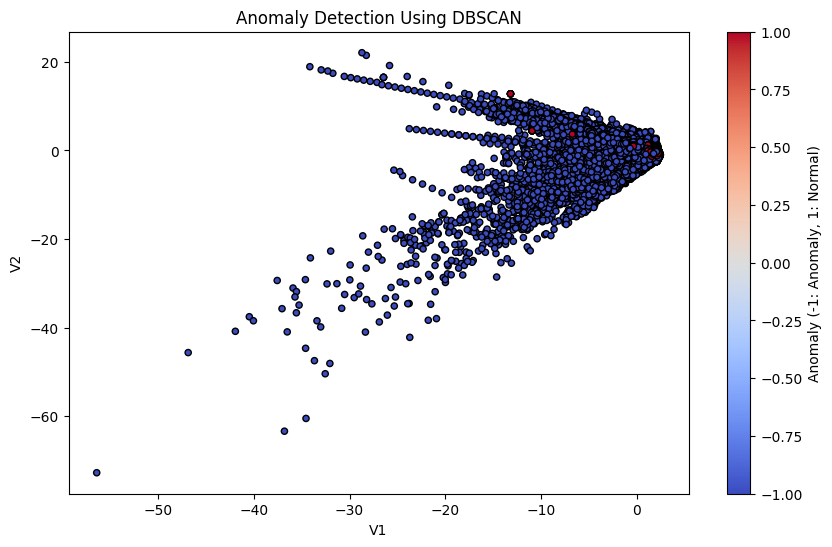

In [51]:
# Visualizing the anomalies using the first two features
plt.figure(figsize=(10, 6))
plt.scatter(new_df['V1'], new_df['V2'], c=new_df['anomaly'], cmap='coolwarm', edgecolors='k', s=20)
plt.title("Anomaly Detection Using DBSCAN")
plt.xlabel("V1")
plt.ylabel("V2")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

In [52]:
# Showing the number of anomalies detected
print("Number of anomalies detected:", new_df['anomaly'].value_counts()[-1])

Number of anomalies detected: 210180


### Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest

X = new_df.drop(columns=['Class'])
is_for = IsolationForest(contamination=0.2, random_state=42)
is_for.fit(X)

# Predict anomalies (-1 for outliers, 1 for normal data points)
new_df['anomaly'] = is_for.predict(X)

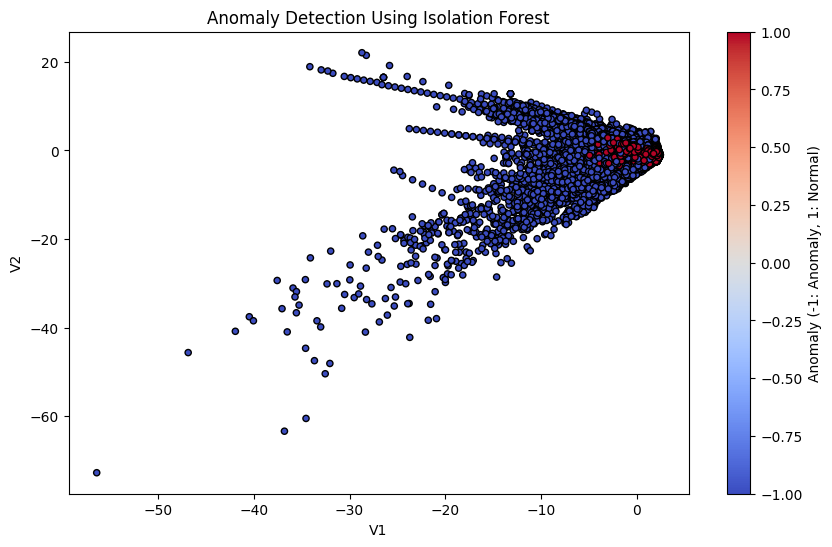

In [54]:
# Plotting the first two features
plt.figure(figsize=(10, 6))
plt.scatter(new_df['V1'], new_df['V2'], c=new_df['anomaly'], cmap='coolwarm', edgecolors='k', s=20)
plt.title("Anomaly Detection Using Isolation Forest")
plt.xlabel("V1")
plt.ylabel("V2")
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()

In [55]:
# Showing the number of anomalies detected
print("Number of anomalies detected:", new_df['anomaly'].value_counts()[-1])

Number of anomalies detected: 56962
